In [5]:
import os
import spacy
import stanza
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import langid

/home/zia/miniconda3/lib/python3.11/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [6]:
# Charger les modèles SpaCy pour les langues prises en charge
def load_spacy_models():
    spacy_models = {}
    supported_languages = ['de', 'en', 'fr', 'es', 'ja', 'pt', 'ru', 'ko', 'zh']
    for lang in supported_languages:
        try:
            spacy_models[lang] = spacy.load(f"{lang}_core_web_sm")
        except OSError:
            try:
                spacy_models[lang] = spacy.load(f"{lang}_core_news_sm")
            except OSError:
                print(f"No compatible package found for '{lang}'")
    return spacy_models

# Charger les modèles Stanza pour les langues non prises en charge par SpaCy
def load_stanza_models():
    stanza_models = {}
    for lang in ['ar', 'tr', 'vi','it']:
        stanza_models[lang] = stanza.Pipeline(lang=lang)
    return stanza_models

In [7]:
# Tokenisation du texte en fonction de la langue
def tokenize(lang, text, spacy_models, stanza_models):
    if lang in stanza_models:
        nlp = stanza_models[lang]
        doc = nlp(text)
        return [word.text for sent in doc.sentences for word in sent.words]
    else:
        nlp = spacy_models[lang]
        doc = nlp(text)
        return [token.text for token in doc]

In [8]:
# Charger les modèles SpaCy et Stanza
spacy_models = load_spacy_models()
stanza_models = load_stanza_models()

# Calculer les statistiques sur les données
def get_stats(data):
    languages = defaultdict(int)
    tokens = defaultdict(int)

    for _, row in data.iterrows():
        lang = row["labels"]
        text = row["text"]
        languages[lang] += 1
        tokens[lang] += len(tokenize(lang, text, spacy_models, stanza_models))

    stats = {
        "n_lang": len(languages),
        "n_text": sum(languages.values()),
        "n_text_per_lang": languages,
        "mean_tokens_per_text": {lang: tokens[lang] / languages[lang] for lang in languages},
        "n_text_under_100_tokens": {lang: sum(len(text) < 100 for text in data[data["labels"] == lang]["text"]) for lang in languages},
        "ratio_text_under_100_tokens": {lang: sum(len(tokenize(lang, text, spacy_models, stanza_models)) < 100 for text in data[data["labels"] == lang]["text"]) / languages[lang] for lang in languages}
    }

    df_stats = pd.DataFrame(stats).T
    df_stats["Global"] = df_stats.sum(axis=1)
    return df_stats

2024-05-12 13:59:53 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-05-12 13:59:54 INFO: Downloaded file to /home/zia/stanza_resources/resources.json
2024-05-12 13:59:55 INFO: Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |
| depparse  | padt_charlm   |
| ner       | aqmar_charlm  |

2024-05-12 13:59:55 INFO: Using device: cpu
2024-05-12 13:59:55 INFO: Loading: tokenize
2024-05-12 13:59:56 INFO: Loading: mwt
2024-05-12 13:59:56 INFO: Loading: pos
2024-05-12 13:59:56 INFO: Loading: lemma
2024-05-12 13:59:57 INFO: Loading: depparse
2024-05-12 13:59:57 INFO: Loading: ner
2024-05-12 13:59:58 INFO: Done loading processors!
2024-05-12 13:59:58 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-05-12 13:59:58 INFO: Downloaded file to /home/zia/stanza_resources/resources.json
2024-05-12 13:59:59 INFO: Loading these models for language: tr (Turkish):
| Processor | Package       |
-----------------------------
| tokenize  | imst          |
| mwt       | imst          |
| pos       | imst_charlm   |
| lemma     | imst_nocharlm |
| depparse  | imst_charlm   |
| ner       | starlang      |

2024-05-12 13:59:59 INFO: Using device: cpu
2024-05-12 13:59:59 INFO: Loading: tokenize
2024-05-12 13:59:59 INFO: Loading: mwt
2024-05-12 13:59:59 INFO: Loading: pos
2024-05-12 13:59:59 INFO: Loading: lemma
2024-05-12 13:59:59 INFO: Loading: depparse
2024-05-12 14:00:00 INFO: Loading: ner
2024-05-12 14:00:00 INFO: Done loading processors!
2024-05-12 14:00:00 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-05-12 14:00:00 INFO: Downloaded file to /home/zia/stanza_resources/resources.json
2024-05-12 14:00:02 INFO: Loading these models for language: vi (Vietnamese):
| Processor    | Package       |
--------------------------------
| tokenize     | vtb           |
| pos          | vtb_charlm    |
| lemma        | identity      |
| constituency | vlsp22_charlm |
| depparse     | vtb_charlm    |
| sentiment    | vsfc_charlm   |
| ner          | vlsp          |

2024-05-12 14:00:02 INFO: Using device: cpu
2024-05-12 14:00:02 INFO: Loading: tokenize
2024-05-12 14:00:02 INFO: Loading: pos
2024-05-12 14:00:03 INFO: Loading: lemma
2024-05-12 14:00:03 INFO: Loading: constituency
2024-05-12 14:00:03 INFO: Loading: depparse
2024-05-12 14:00:03 INFO: Loading: sentiment
2024-05-12 14:00:04 INFO: Loading: ner
2024-05-12 14:00:04 INFO: Done loading processors!
2024-05-12 14:00:04 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with

2024-05-12 14:00:05 INFO: Downloaded file to /home/zia/stanza_resources/resources.json
2024-05-12 14:00:06 INFO: Loading these models for language: it (Italian):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | vit_charlm        |
| depparse     | combined_charlm   |
| ner          | fbk               |

2024-05-12 14:00:06 INFO: Using device: cpu
2024-05-12 14:00:06 INFO: Loading: tokenize
2024-05-12 14:00:06 INFO: Loading: mwt
2024-05-12 14:00:06 INFO: Loading: pos
2024-05-12 14:00:07 INFO: Loading: lemma
2024-05-12 14:00:07 INFO: Loading: constituency
2024-05-12 14:00:07 INFO: Loading: depparse
2024-05-12 14:00:08 INFO: Loading: ner
2024-05-12 14:00:08 INFO: Done loading processors!


In [9]:

# Calculer les métriques de diversité lexicale
def calculate_metrics(data):
    language_data = defaultdict(list)

    for _, row in data.iterrows():
        tokens = tokenize(row["labels"], row["text"], spacy_models, stanza_models)
        language_data[row["labels"]].append(tokens)

    results = {}
    for lang, tokens_list in language_data.items():
        total_words = sum(len(tokens) for tokens in tokens_list)
        unique_words = len(set(word for tokens in tokens_list for word in tokens))
        average_words_per_sample = total_words / len(tokens_list) if tokens_list else 0
        lexical_diversity = unique_words / total_words if total_words else 0
        results[lang] = {"Average Words per Sample": average_words_per_sample, "Lexical Diversity": lexical_diversity}
    return pd.DataFrame(results)


In [10]:

# Calculer la loi de Zipf pour chaque langue
def zipf_law_by_lang(data):
    results = []

    for text, lang in zip(data["text"], data["labels"]):
        lang = langid.classify(text)[0] if lang == "unknown" else lang
        tokens = tokenize(lang, text, spacy_models, stanza_models)
        freq = pd.Series(tokens).value_counts()
        freq = freq.reset_index()
        freq.columns = ["Token", "Frequency"]
        freq["Rank"] = freq["Frequency"].rank(ascending=False)
        freq["Language"] = lang
        results.append(freq)

    final_df = pd.concat(results)
    final_df["Frequency"] = final_df["Frequency"] / final_df["Frequency"].sum()
    return final_df[["Token", "Frequency", "Rank", "Language"]]

# Tracer la loi de Zipf pour chaque langue
def plot_zipf(data):
    sns.set(style="whitegrid")
    g = sns.FacetGrid(data, col="Language", col_wrap=4, sharex=False, sharey=False)
    g.map(sns.lineplot, "Rank", "Frequency")
    return g.fig

In [11]:

# Calculer la longueur moyenne des phrases par langue
def average_sentence_length(data):
    avg_lengths = {}
    for lang, group in data.groupby("labels"):
        total_sentences = sum(text.count(".") for text in group["text"])
        total_words = sum(len(text.split()) for text in group["text"])
        avg_lengths[lang] = total_words / total_sentences if total_sentences > 0 else 0
    return avg_lengths

# Calculer la distribution des longueurs de texte par langue
def text_length_distribution(data):
    length_distribution = {}
    for lang, group in data.groupby("labels"):
        lengths = [len(text) for text in group["text"]]
        length_distribution[lang] = lengths
    return length_distribution

In [12]:
# Vérifier et créer les répertoires s'ils n'existent pas
resultats_dirs = ["./results/CSV", "./results/IMAGES"]
for directory in resultats_dirs:
    if not os.path.exists(directory):
        os.makedirs(directory)
    else:
        print(f"Le répertoire '{directory}' existe déjà.")

# Charger les données
data = pd.read_csv("../data/clean/results/CSV/result.csv")
print("Les données ont été chargées avec succès.")

Le répertoire './results/CSV' existe déjà.
Le répertoire './results/IMAGES' existe déjà.
Les données ont été chargées avec succès.


In [9]:

# Enregistrer les statistiques
stats_file = "./results/CSV/stats_corpus.csv"
stats = get_stats(data)
print(stats)  # Affichage des statistiques
stats.to_csv(stats_file)
print(f"Les statistiques ont été calculées et enregistrées dans '{stats_file}'.")

                                     pt          fr          it          vi  \
n_lang                        13.000000   13.000000   13.000000   13.000000   
n_text                       614.000000  614.000000  614.000000  614.000000   
n_text_per_lang               47.000000   33.000000   23.000000   79.000000   
mean_tokens_per_text          16.723404   21.151515   21.521739   13.721519   
n_text_under_100_tokens       30.000000   15.000000   12.000000   61.000000   
ratio_text_under_100_tokens    1.000000    1.000000    1.000000    1.000000   

                                     ko      ar     es          ja  \
n_lang                        13.000000   13.00   13.0   13.000000   
n_text                       614.000000  614.00  614.0  614.000000   
n_text_per_lang               69.000000   20.00   40.0   48.000000   
mean_tokens_per_text          11.478261   33.65   19.9   17.416667   
n_text_under_100_tokens       67.000000    8.00   22.0   47.000000   
ratio_text_under_100_token

In [10]:


# Enregistrer les métriques
metrics_file = "./results/CSV/metrics_corpus.csv"
metrics = calculate_metrics(data)
print(metrics)  # Affichage des statistiques
metrics.to_csv(metrics_file)
print(f"Les métriques ont été calculées et enregistrées dans '{metrics_file}'.")

                                 pt         fr         it         vi  \
Average Words per Sample  16.723404  21.151515  21.521739  13.721519   
Lexical Diversity          0.491094   0.485673   0.492929   0.542435   

                                 ko         ar         es         ja  \
Average Words per Sample  11.478261  33.650000  19.900000  17.416667   
Lexical Diversity          0.670455   0.551263   0.476131   0.466507   

                                 de         ru         zh         en  \
Average Words per Sample  11.568627  14.062500  23.837838  20.769231   
Lexical Diversity          0.603390   0.642963   0.575964   0.500000   

                                 tr  
Average Words per Sample  13.059701  
Lexical Diversity          0.628571  
Les métriques ont été calculées et enregistrées dans './results/CSV/metrics_corpus.csv'.


La loi de Zipf a été calculée et enregistrée avec succès.


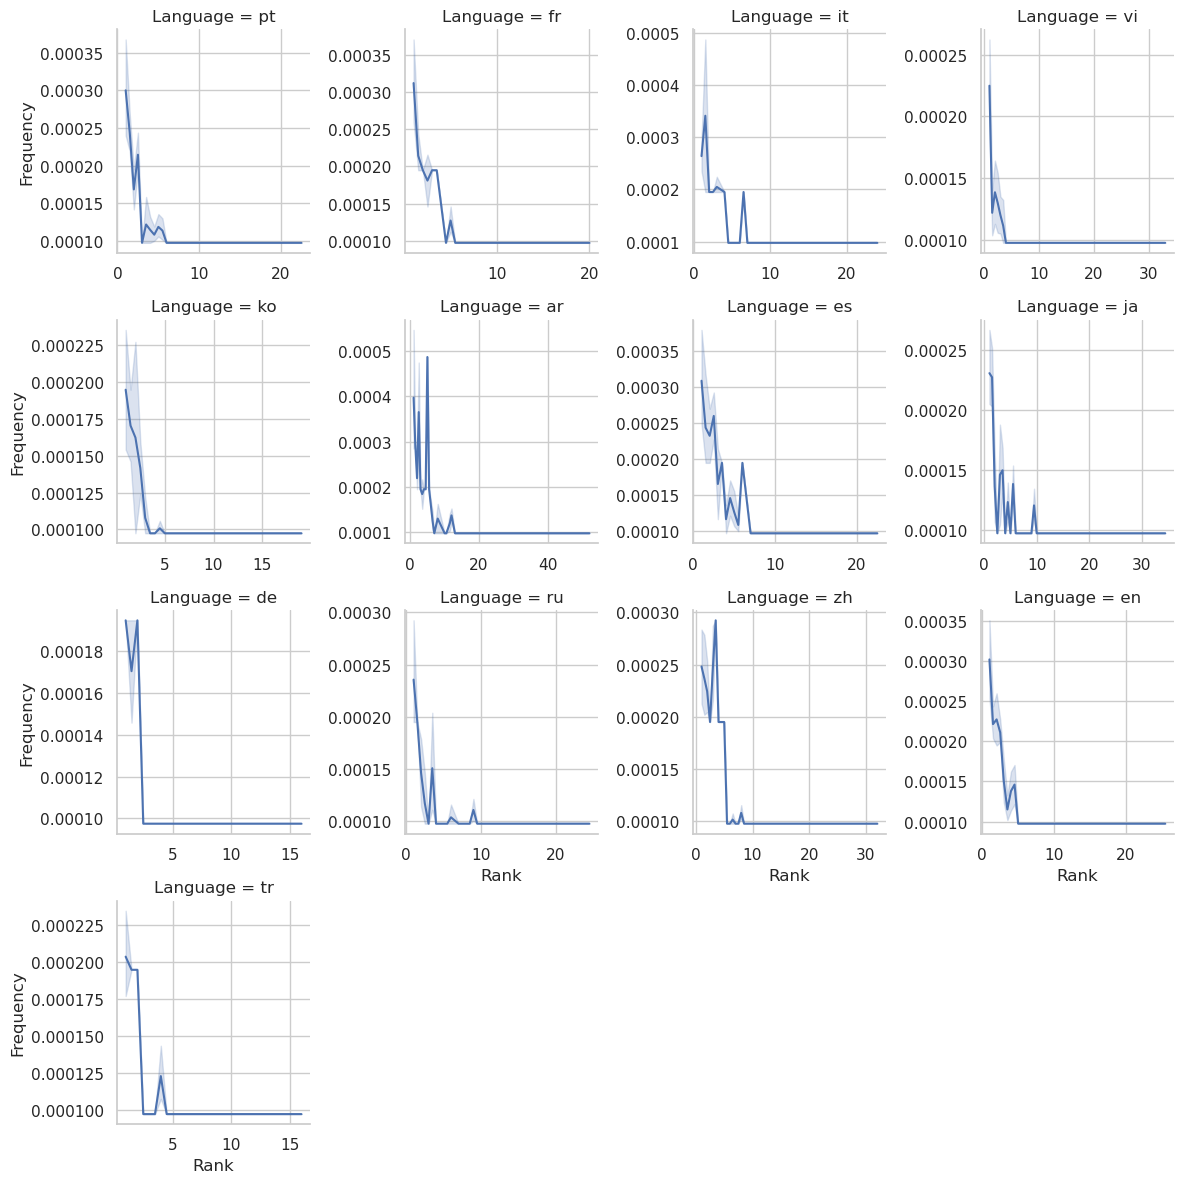

In [11]:

# Calculer la loi de Zipf et tracer
zipf_results = zipf_law_by_lang(data)
zipf_plot = plot_zipf(zipf_results)
zipf_plot.savefig("./results/IMAGES/zipf.png", facecolor="white", dpi=300)
print("La loi de Zipf a été calculée et enregistrée avec succès.")

In [12]:

# Calculer et sauvegarder la longueur moyenne des phrases par langue
avg_sentence_lengths = average_sentence_length(data)
avg_sentence_lengths_df = pd.DataFrame(avg_sentence_lengths.items(), columns=["Language", "Average Sentence Length"])
print(avg_sentence_lengths_df)  # Affichage des longueurs moyennes des phrases
avg_sentence_lengths_df.to_csv("./results/CSV/avg_sentence_lengths.csv", index=False)
print("La longueur moyenne des phrases par langue a été calculée et enregistrée avec succès.")

   Language  Average Sentence Length
0        ar                16.944444
1        de                11.931818
2        en                15.666667
3        es                17.390244
4        fr                18.870968
5        it                14.615385
6        ja                34.500000
7        ko                10.175439
8        pt                11.677966
9        ru                11.204082
10       tr                11.322581
11       vi                21.862069
12       zh                50.000000
La longueur moyenne des phrases par langue a été calculée et enregistrée avec succès.


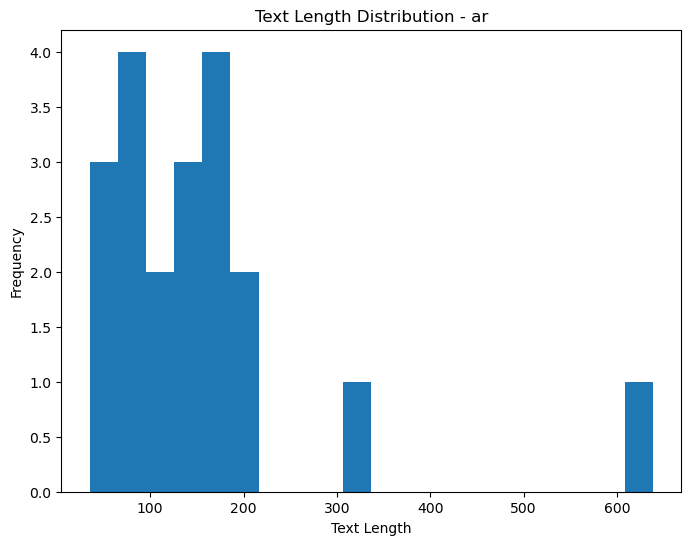

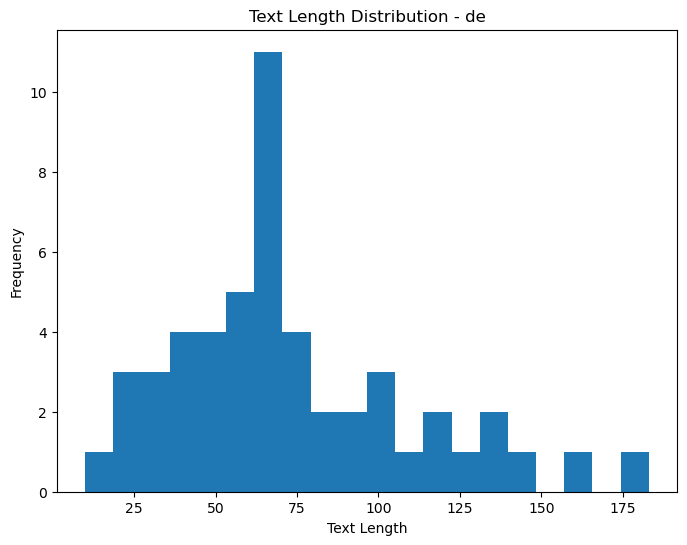

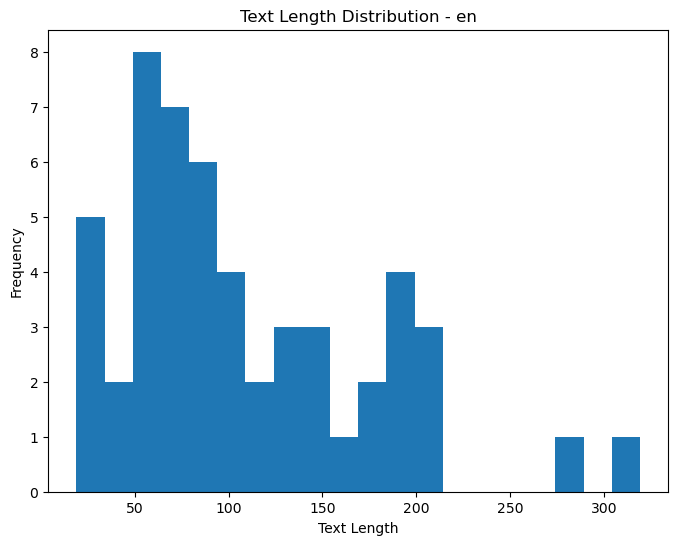

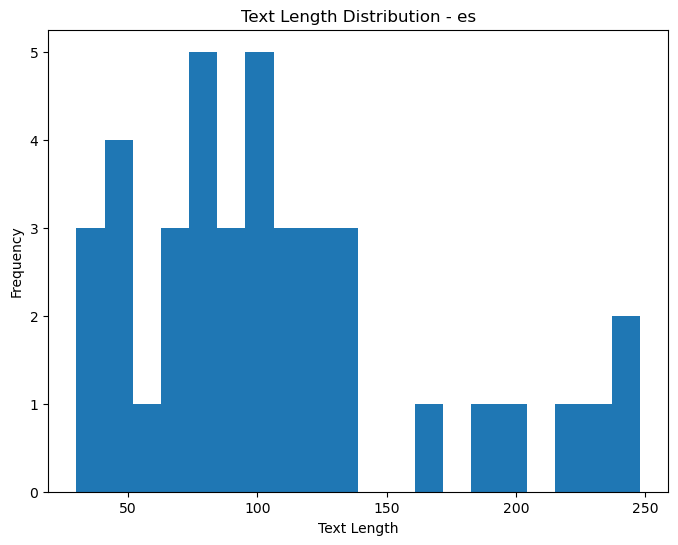

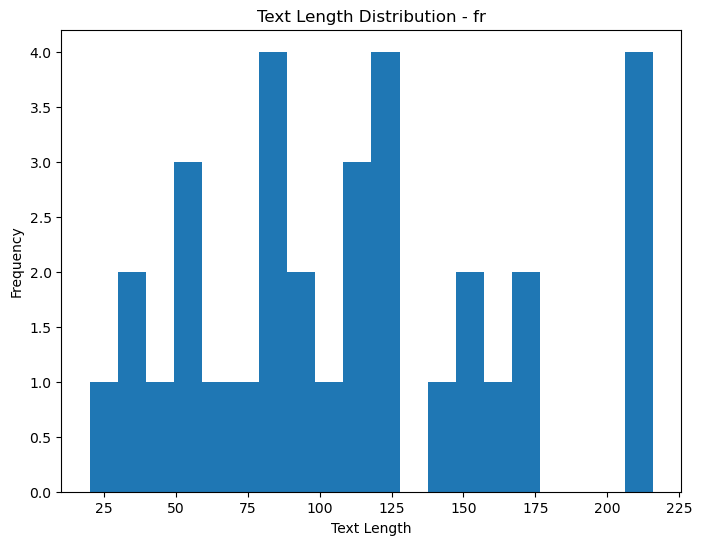

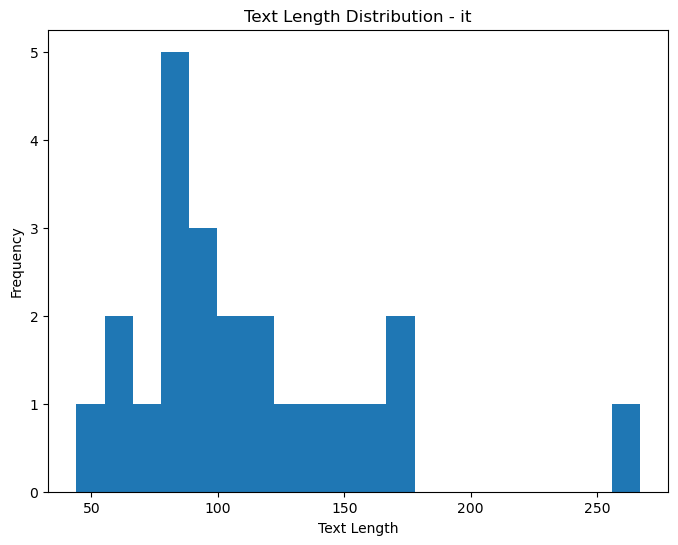

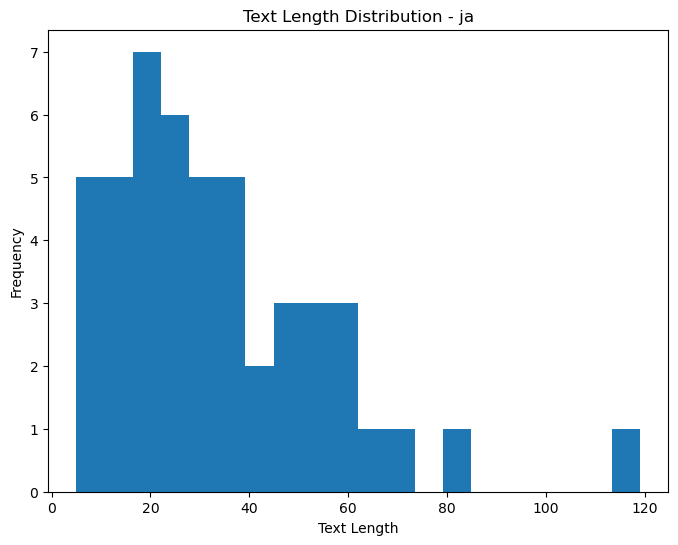

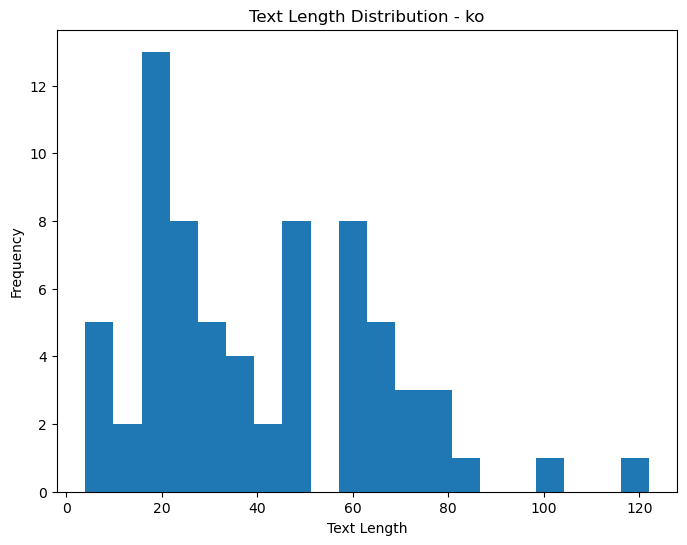

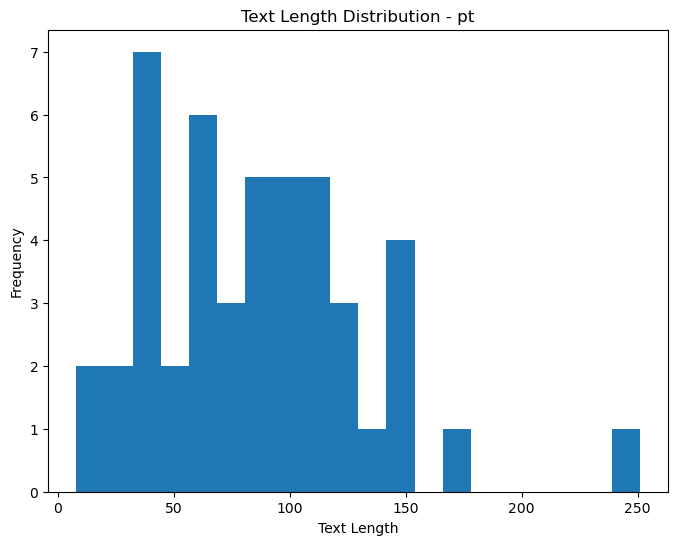

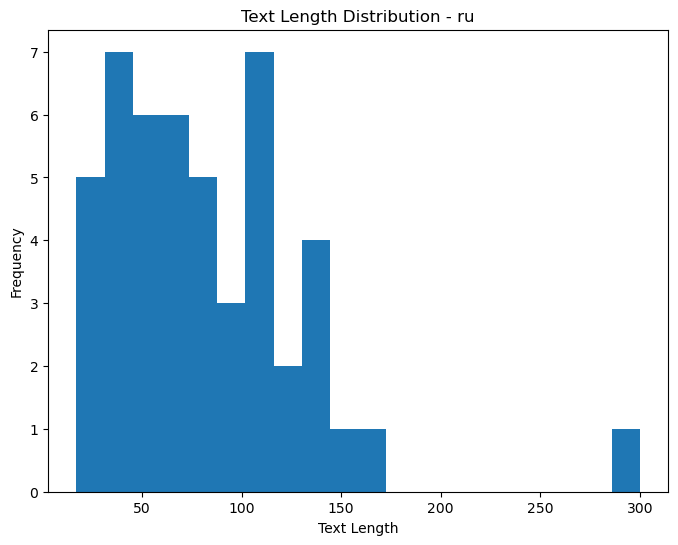

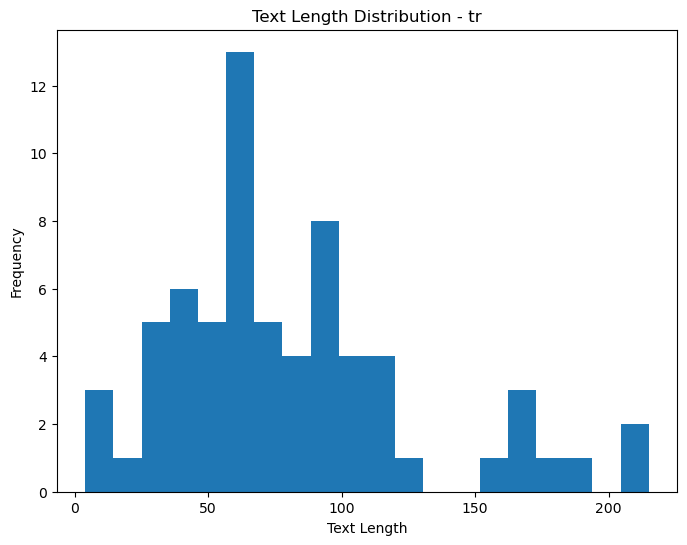

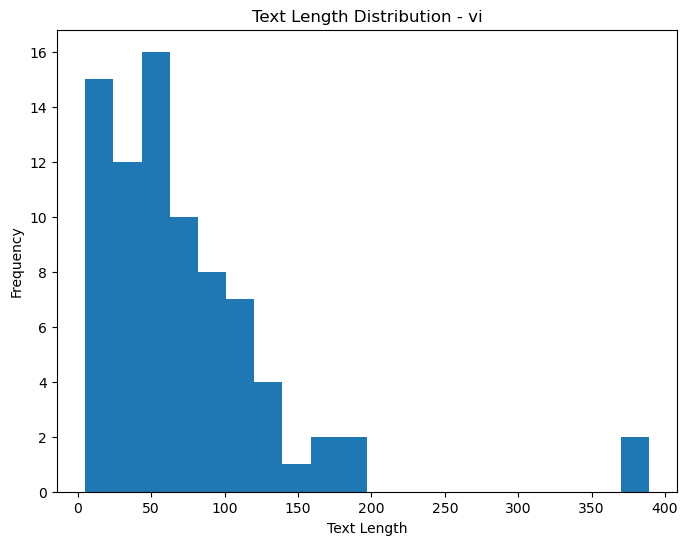

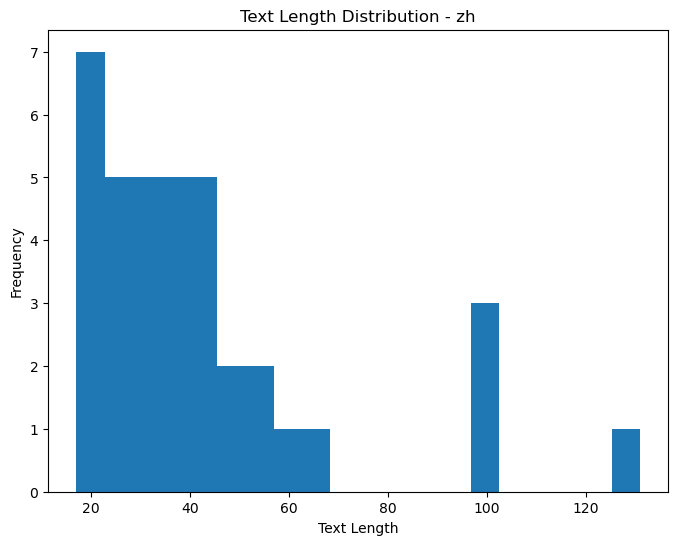

La distribution des longueurs de texte par langue a été calculée et enregistrée avec succès.


In [16]:
# Calculer la distribution des longueurs de texte par langue
length_distributions = text_length_distribution(data)

# Afficher et sauvegarder la distribution des longueurs de texte par langue
for lang, lengths in length_distributions.items():
    plt.figure(figsize=(8, 6))
    plt.hist(lengths, bins=20)
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.title(f"Text Length Distribution - {lang}")
    plt.savefig(f"./results/IMAGES/text_length_distribution_{lang}.png", facecolor="white", dpi=300)
    plt.show()

print("La distribution des longueurs de texte par langue a été calculée et enregistrée avec succès.")


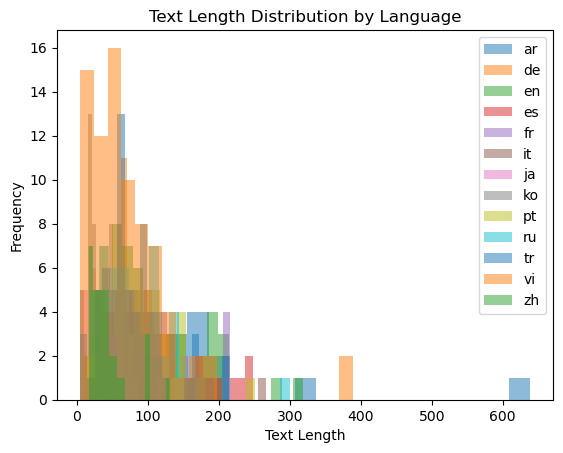

La distribution des longueurs de texte par langue a été calculée et enregistrée avec succès.


In [17]:
# Afficher et sauvegarder la distribution des longueurs de texte par langue
for lang, lengths in length_distributions.items():
    plt.hist(lengths, bins=20, alpha=0.5, label=lang)

plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Text Length Distribution by Language")
plt.legend()
plt.savefig("./results/IMAGES/text_length_distributions.png", facecolor="white", dpi=300)
plt.show()

print("La distribution des longueurs de texte par langue a été calculée et enregistrée avec succès.")